# Getting the distances values from the Kitti Dataset

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import glob

## Load the image and label information 

There are 6 images


Text(0.5, 1.0, 'Image Right')

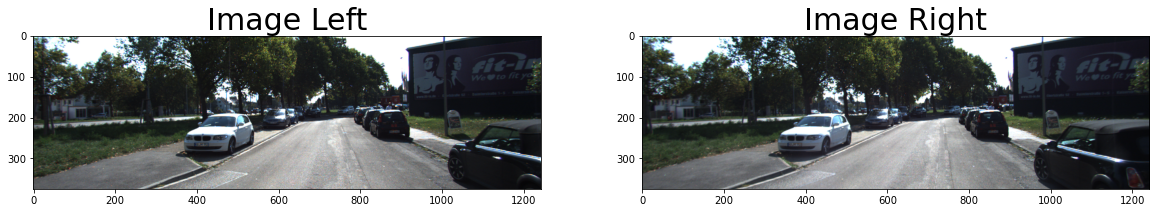

In [2]:
images_L = sorted(glob.glob("data/left/*.png"))
images_R =  sorted(glob.glob("data/right/*.png"))
labels =  sorted(glob.glob("data/labels/*.txt"))
calib_files =  sorted(glob.glob("data/calib/*.txt"))

print("There are",len(images_L),"images")

index = 3

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.imshow(cv2.cvtColor(cv2.imread(images_L[index]), cv2.COLOR_BGR2RGB))
ax1.set_title('Image Left', fontsize=30)
ax2.imshow(cv2.cvtColor(cv2.imread(images_R[index]), cv2.COLOR_BGR2RGB))
ax2.set_title('Image Right', fontsize=30)

## Get the Ground Truth 

Car 0.80 0 -2.09 1013.39 182.46 1241.00 374.00 1.57 1.65 3.35 4.43 1.65 5.20 -1.42

1013 182 1241 374
Car 0.00 0 1.95 354.43 185.52 549.52 294.49 1.43 1.70 3.95 -2.39 1.66 11.80 1.76

354 185 549 294
Pedestrian 0.00 2 1.41 859.54 159.80 879.68 221.40 1.96 0.72 1.09 8.33 1.55 23.51 1.75

859 159 879 221
Car 0.00 0 -1.78 819.63 178.12 926.85 251.56 1.51 1.60 3.24 5.85 1.64 16.50 -1.44

819 178 926 251
Car 0.00 2 -1.69 800.54 178.06 878.75 230.56 1.45 1.74 4.10 6.87 1.62 22.05 -1.39

800 178 878 230
Car 0.00 0 1.80 558.55 179.04 635.05 230.61 1.54 1.68 3.79 -0.38 1.76 23.64 1.78

558 179 635 230
Car 0.00 2 1.77 598.30 178.68 652.25 218.17 1.49 1.52 3.35 0.64 1.74 29.07 1.79

598 178 652 218
Car 0.00 1 -1.67 784.59 178.04 839.98 220.10 1.53 1.65 4.37 7.88 1.75 28.53 -1.40

784 178 839 220
Car 0.00 1 1.92 663.74 175.36 707.21 204.15 1.64 1.45 3.48 4.50 1.80 42.85 2.02

663 175 707 204


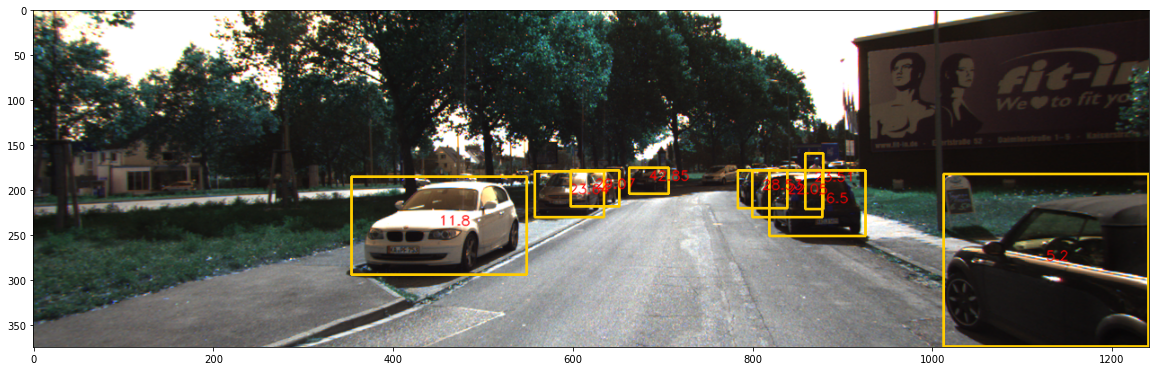

In [3]:
def ground_truth_display(img_label, index):
    with open(labels[index], 'r') as f:
            fin = f.readlines()
            for line in fin:
                if line.split(" ")[0] != "DontCare":
                    print(line)
                    x1_value = int(float(line.split(" ")[4]))
                    y1_value = int(float(line.split(" ")[5]))
                    x2_value = int(float(line.split(" ")[6]))
                    y2_value = int(float(line.split(" ")[7]))
                    distance = float(line.split(" ")[13])
                    print(x1_value,y1_value,x2_value,y2_value)
                    cv2.rectangle(img_label, (x1_value, y1_value), (x2_value, y2_value), (255,205,0), 2)
                    cv2.putText(img_label, str(distance), (int((x1_value+x2_value)/2),int((y1_value+y2_value)/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)    
    return img_label

img_label = cv2.imread(images_L[index])
img_label = ground_truth_display(img_label, index)
plt.figure(figsize=(20,40))
plt.imshow(img_label)
plt.show()